In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
train=pd.concat([pd.read_csv("../input/stage2_newtraincountfeat.csv",index_col=0),
                pd.read_csv("../input/stage1_combined_train_variant.csv",index_col=0)['Class']],axis=1)
train.shape,train.isnull().sum().sum()

((3689, 1968), 0)

In [4]:
test=pd.read_csv("../input/stage2_newtestcountfeat.csv",index_col=0)

In [5]:
a=(train.groupby("Class").sum()/train.sum()).T*100
a.max(axis=1).sort_values()

dash_line_represent                                        18.181818
mappable                                                   19.047619
pdgfrb_encode                                              21.052632
site_pre                                                   21.354167
detection_somatic_mutation                                 21.739130
buffer_mmol_tris_hcl                                       21.739130
nih_gov                                                    21.842650
cancer_survival                                            22.727273
delet                                                      23.903467
alternative_transcript                                     24.137931
role_carcinogenesis                                        24.137931
variant_likely                                             24.777184
bayes                                                      25.799574
tcep                                                       25.806452
mutation_brca                     

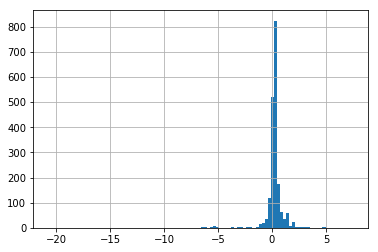

In [6]:
a=((train>0).mean()-(test>0).mean())*100
a.hist(bins=100)

In [7]:
a.abs().sort_values()

isopropyl_thiogalactoside                       0.000935
amplification_assess                            0.000935
translocation_involve_myc                       0.000935
egfrl858r                                       0.000935
approach_broad                                  0.000935
cos7_cell_transiently_transfect                 0.000935
fusion_peptide                                  0.000935
brca1_brca2_uvs                                 0.000935
20892                                           0.000935
brca2_uvs                                       0.000935
western_blot_analysis_cell_lysate               0.003739
486                                             0.003739
point_mutation_observe                          0.004206
mek_extracellular                               0.004206
cdk4_catalytic_activity                         0.006076
expect_display                                  0.006076
premature_senescence                            0.006076
housing                        

In [8]:
idf=np.log(1/(train>0).drop("Class",axis=1).mean())

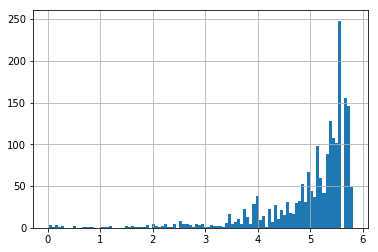

sequenc                                          0.016950
includ                                           0.025255
aci                                              0.038971
amino                                            0.128857
000                                              0.146903
regulat                                          0.153834
onco                                             0.169126
delet                                            0.230694
antibody                                         0.284705
leng                                             0.297763
progres                                          0.506948
strongly                                         0.530628
usc                                              0.672489
lymph                                            0.715903
roi                                              0.774727
inhibitory                                       0.860029
pharma                                           1.011194
medical       

In [9]:
idf.hist(bins=100);plt.show()
idf.sort_values()

In [10]:
train_tfidf=train.drop("Class",axis=1)*idf

In [11]:
train_tfidf[train_tfidf==0]=np.nan

In [12]:
train_tfidf.to_csv("../input/stage2_newtraintfidf.csv")

In [13]:
train_tfidf.shape

(3689, 1967)

In [14]:
test_tfidf=test*idf

In [15]:
test_tfidf[test_tfidf==0]=np.nan

In [16]:
test_tfidf.to_csv("../input/stage2_newtesttfidf.csv")

In [17]:
test_tfidf.shape

(986, 1967)

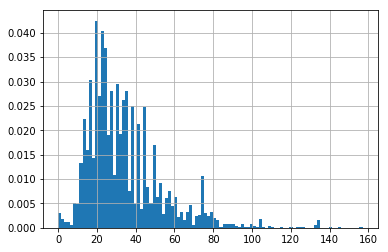

In [18]:
(train_tfidf>0).sum(1).hist(bins=100,normed=True)

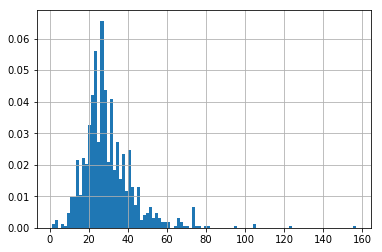

In [19]:
(test_tfidf>0).sum(1).hist(bins=100,normed=True)